In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../src')
from data_preprocessing import (
    TimeFeatureExtractor, 
    NumericAggregator, 
    CategoricalAggregator, 
    build_preprocessing_pipeline
)
from dataloader import DataLoader

In [3]:
loader = DataLoader('../data/data.csv')
df = loader.load()

print(f"Original Data Shape: {df.shape}")
df.head(3)

2025-12-16 18:53:41,132 - INFO - Data loaded successfully. Shape: (95662, 16)


Original Data Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0


In [4]:
time_ext = TimeFeatureExtractor()
df = time_ext.transform(df)
print(f"Data Shape after Time Feature Extraction: {df.shape}")

Data Shape after Time Feature Extraction: (95662, 20)


In [5]:
num_agg = NumericAggregator(customer_col='CustomerId', amount_col='Amount')
df_numeric = num_agg.transform(df)

print(f"Numeric Table Shape: {df_numeric.shape}")
df_numeric.head(3)

🔄 Aggregating Numeric Features...
Numeric Table Shape: (3742, 11)


,CustomerId,total_amount,avg_amount,std_amount,txn_count,Amount_min,Amount_max,Value_sum,Value_mean,avg_txn_hour,std_txn_hour
0,CustomerId_1,-10000.0,-10000.0,0.000000,1,-10000.0,-10000.0,10000,10000.0,16.0,0.000000
1,CustomerId_10,-10000.0,-10000.0,0.000000,1,-10000.0,-10000.0,10000,10000.0,16.0,0.000000
2,CustomerId_1001,20000.0,4000.0,6558.963333,5,-5000.0,10000.0,30400,6080.0,7.8,0.447214


In [6]:
cat_agg = CategoricalAggregator(customer_col='CustomerId', cat_cols=['ProductCategory', 'ChannelId'])
df_categorical = cat_agg.transform(df)

print(f"Categorical Table Shape: {df_categorical.shape}")
df_categorical.head(3)

🔄 Aggregating Categorical Features...
Categorical Table Shape: (3742, 14)


,CustomerId,ProductCategory_airtime_ratio,ProductCategory_data_bundles_ratio,ProductCategory_financial_services_ratio,ProductCategory_movies_ratio,ProductCategory_other_ratio,ProductCategory_ticket_ratio,ProductCategory_transport_ratio,ProductCategory_tv_ratio,ProductCategory_utility_bill_ratio,ChannelId_ChannelId_1_ratio,ChannelId_ChannelId_2_ratio,ChannelId_ChannelId_3_ratio,ChannelId_ChannelId_5_ratio
0,CustomerId_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,CustomerId_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,CustomerId_1001,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0


In [7]:
df_features = pd.merge(df_numeric, df_categorical, on='CustomerId', how='inner')

print(f"✅ Complete Feature Table Shape: {df_features.shape}")
print("Columns:", df_features.columns.tolist())
df_features.head()

✅ Complete Feature Table Shape: (3742, 24)
Columns: ['CustomerId', 'total_amount', 'avg_amount', 'std_amount', 'txn_count', 'Amount_min', 'Amount_max', 'Value_sum', 'Value_mean', 'avg_txn_hour', 'std_txn_hour', 'ProductCategory_airtime_ratio', 'ProductCategory_data_bundles_ratio', 'ProductCategory_financial_services_ratio', 'ProductCategory_movies_ratio', 'ProductCategory_other_ratio', 'ProductCategory_ticket_ratio', 'ProductCategory_transport_ratio', 'ProductCategory_tv_ratio', 'ProductCategory_utility_bill_ratio', 'ChannelId_ChannelId_1_ratio', 'ChannelId_ChannelId_2_ratio', 'ChannelId_ChannelId_3_ratio', 'ChannelId_ChannelId_5_ratio']


,CustomerId,total_amount,avg_amount,std_amount,txn_count,Amount_min,Amount_max,Value_sum,Value_mean,avg_txn_hour,...,ProductCategory_movies_ratio,ProductCategory_other_ratio,ProductCategory_ticket_ratio,ProductCategory_transport_ratio,ProductCategory_tv_ratio,ProductCategory_utility_bill_ratio,ChannelId_ChannelId_1_ratio,ChannelId_ChannelId_2_ratio,ChannelId_ChannelId_3_ratio,ChannelId_ChannelId_5_ratio
0,CustomerId_1,-10000.0,-10000.000000,0.000000,1,-10000.0,-10000.0,10000,10000.000000,16.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
1,CustomerId_10,-10000.0,-10000.000000,0.000000,1,-10000.0,-10000.0,10000,10000.000000,16.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
2,CustomerId_1001,20000.0,4000.000000,6558.963333,5,-5000.0,10000.0,30400,6080.000000,7.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.600000,0.0
3,CustomerId_1002,4225.0,384.090909,560.498966,11,-75.0,1500.0,4775,434.090909,13.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.454545,0.0
4,CustomerId_1003,20000.0,3333.333333,6030.478146,6,-5000.0,10000.0,32000,5333.333333,14.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0


In [8]:
missing = df_features.isnull().sum()
missing = missing[missing > 0]

print("Missing Values Check:")
if missing.empty:
    print("✅ No missing values found.")
else:
    print(missing)
    # Strategy: Fill remaining numeric NaNs with 0
    df_features.fillna(0, inplace=True)

Missing Values Check:
✅ No missing values found.


In [9]:
cols_to_scale = [c for c in df_features.columns if c != 'CustomerId']

In [10]:
pipeline = build_preprocessing_pipeline(numeric_features=cols_to_scale)

# 3. Fit and Transform
print("🔄 Normalizing features...")
X_scaled_array = pipeline.fit_transform(df_features)

🔄 Normalizing features...


In [11]:
df_scaled = pd.DataFrame(X_scaled_array, columns=cols_to_scale)
df_scaled.insert(0, 'CustomerId', df_features['CustomerId'])

print("✅ Normalization Complete. Sample:")
print(df_scaled.head())

✅ Normalization Complete. Sample:
        CustomerId  total_amount  avg_amount  std_amount  txn_count  \
0     CustomerId_1     -0.066891   -0.153364   -0.140432  -0.253459   
1    CustomerId_10     -0.066891   -0.153364   -0.140432  -0.253459   
2  CustomerId_1001     -0.055849   -0.069870   -0.072731  -0.212186   
3  CustomerId_1002     -0.061655   -0.091435   -0.134647  -0.150278   
4  CustomerId_1003     -0.055849   -0.073846   -0.078186  -0.201868   

   Amount_min  Amount_max  Value_sum  Value_mean  avg_txn_hour  ...  \
0   -0.161532   -0.169081  -0.089524   -0.052297      0.883284  ...   
1   -0.161532   -0.169081  -0.089524   -0.052297      0.883284  ...   
2   -0.103274   -0.113497  -0.082011   -0.075710     -1.222654  ...   
3   -0.045890   -0.137120  -0.091448   -0.109431      0.229556  ...   
4   -0.103274   -0.113497  -0.081422   -0.080169      0.455248  ...   

   ProductCategory_movies_ratio  ProductCategory_other_ratio  \
0                     -0.099954                 

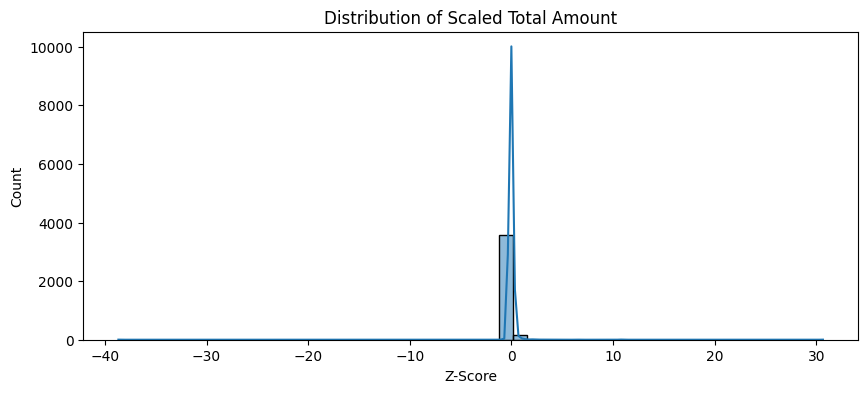

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df_scaled['total_amount'], bins=50, kde=True)
plt.title("Distribution of Scaled Total Amount")
plt.xlabel("Z-Score")
plt.show()

In [13]:
import os
os.makedirs('../data/processed', exist_ok=True)

# 1. Save Unscaled Features (For EDA, WoE, and Task 4)
df_features.to_csv('../data/processed/customer_features.csv', index=False)

# 2. Save Scaled Features (For Model Training Task 5 & 6)
df_scaled.to_csv('../data/processed/customer_features_scaled.csv', index=False)

print("✅ Saved unscaled features to: ../data/processed/customer_features.csv")
print("✅ Saved scaled features to:   ../data/processed/customer_features_scaled.csv")

✅ Saved unscaled features to: ../data/processed/customer_features.csv
✅ Saved scaled features to:   ../data/processed/customer_features_scaled.csv



# ## 6. Weight of Evidence (WoE) and IV
# 
# **Theory:**
# *   **WoE:** Measures how much a specific feature value "supports" the target (Good vs Bad risk).
# *   **IV (Information Value):** A single number ranking the feature's predictive power.
# 
# **Constraint:** WoE requires a **Target Variable**. We do not have this until Task 4 (RFM Clustering).
# 

